In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import dabl

In [2]:
data=pd.read_csv('WildBlueberryPollinationSimulationData.csv')

In [3]:
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


## Preprocessing

In [4]:
data.drop(columns=['Row#'],axis=1,inplace=True)

In [5]:
data.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [7]:
data.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [8]:
data.isnull().any()

clonesize               False
honeybee                False
bumbles                 False
andrena                 False
osmia                   False
MaxOfUpperTRange        False
MinOfUpperTRange        False
AverageOfUpperTRange    False
MaxOfLowerTRange        False
MinOfLowerTRange        False
AverageOfLowerTRange    False
RainingDays             False
AverageRainingDays      False
fruitset                False
fruitmass               False
seeds                   False
yield                   False
dtype: bool

In [9]:
data.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [10]:
data.duplicated().sum()

0

### Univariate analysis 

<function matplotlib.pyplot.show(close=None, block=None)>

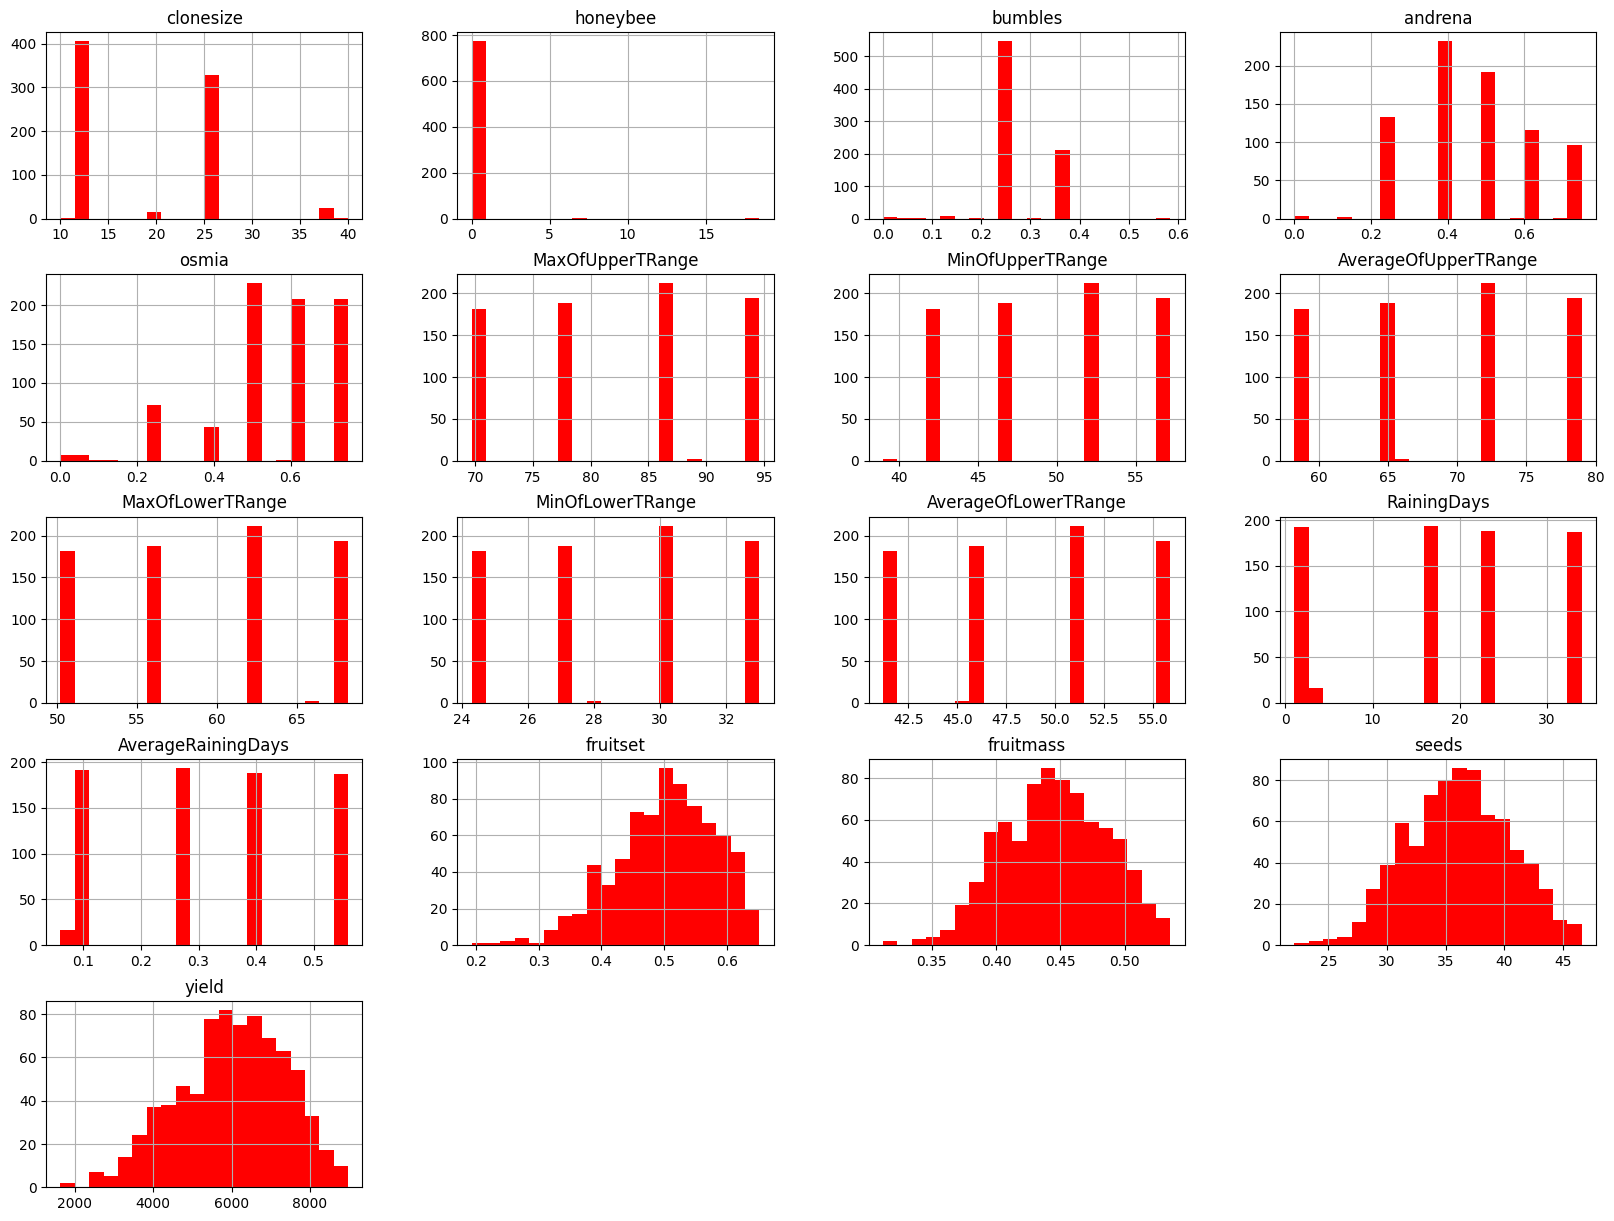

In [11]:
data.hist(layout=(5,4), figsize=(20,15), bins=20, color='red')
plt.title('Histogram of Data')
plt.show

<Axes: ylabel='yield'>

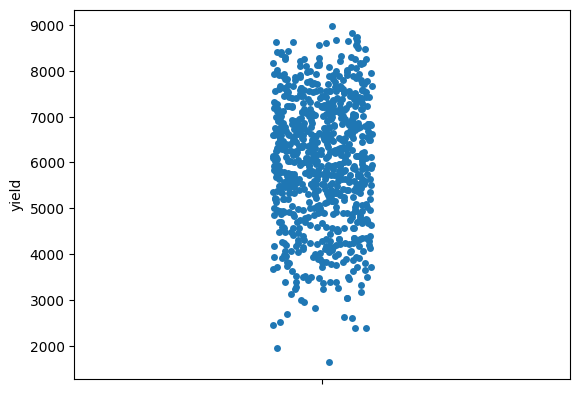

In [12]:
sns.stripplot(y=data['yield'])

###  Bivariate analysis  

Target looks like regression


[<Axes: title={'center': 'Target distribution'}, xlabel='yield', ylabel='frequency'>,
 array([[<Axes: title={'center': 'F=9.82E-01'}, xlabel='fruitset', ylabel='yield'>,
         <Axes: title={'center': 'F=9.64E-01'}, xlabel='seeds'>,
         <Axes: title={'center': 'F=9.27E-01'}, xlabel='fruitmass'>,
         <Axes: title={'center': 'F=-5.75E-01'}, xlabel='RainingDays (jittered)'>],
        [<Axes: title={'center': 'F=-5.46E-01'}, xlabel='AverageRainingDays (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=-4.98E-01'}, xlabel='clonesize (jittered)'>,
         <Axes: title={'center': 'F=-3.41E-01'}, xlabel='honeybee (jittered)'>,
         <Axes: title={'center': 'F=3.15E-01'}, xlabel='osmia (jittered)'>],
        [<Axes: title={'center': 'F=2.86E-01'}, xlabel='bumbles (jittered)', ylabel='yield'>,
         <Axes: title={'center': 'F=-1.61E-01'}, xlabel='MaxOfLowerTRange (jittered)'>,
         <Axes: title={'center': 'F=-1.61E-01'}, xlabel='MaxOfUpperTRange (jittered)'>

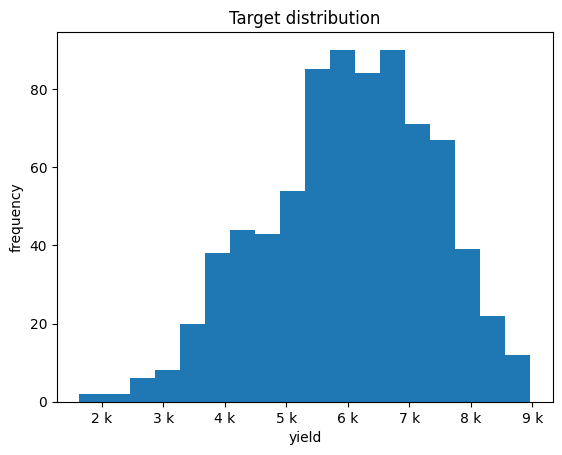

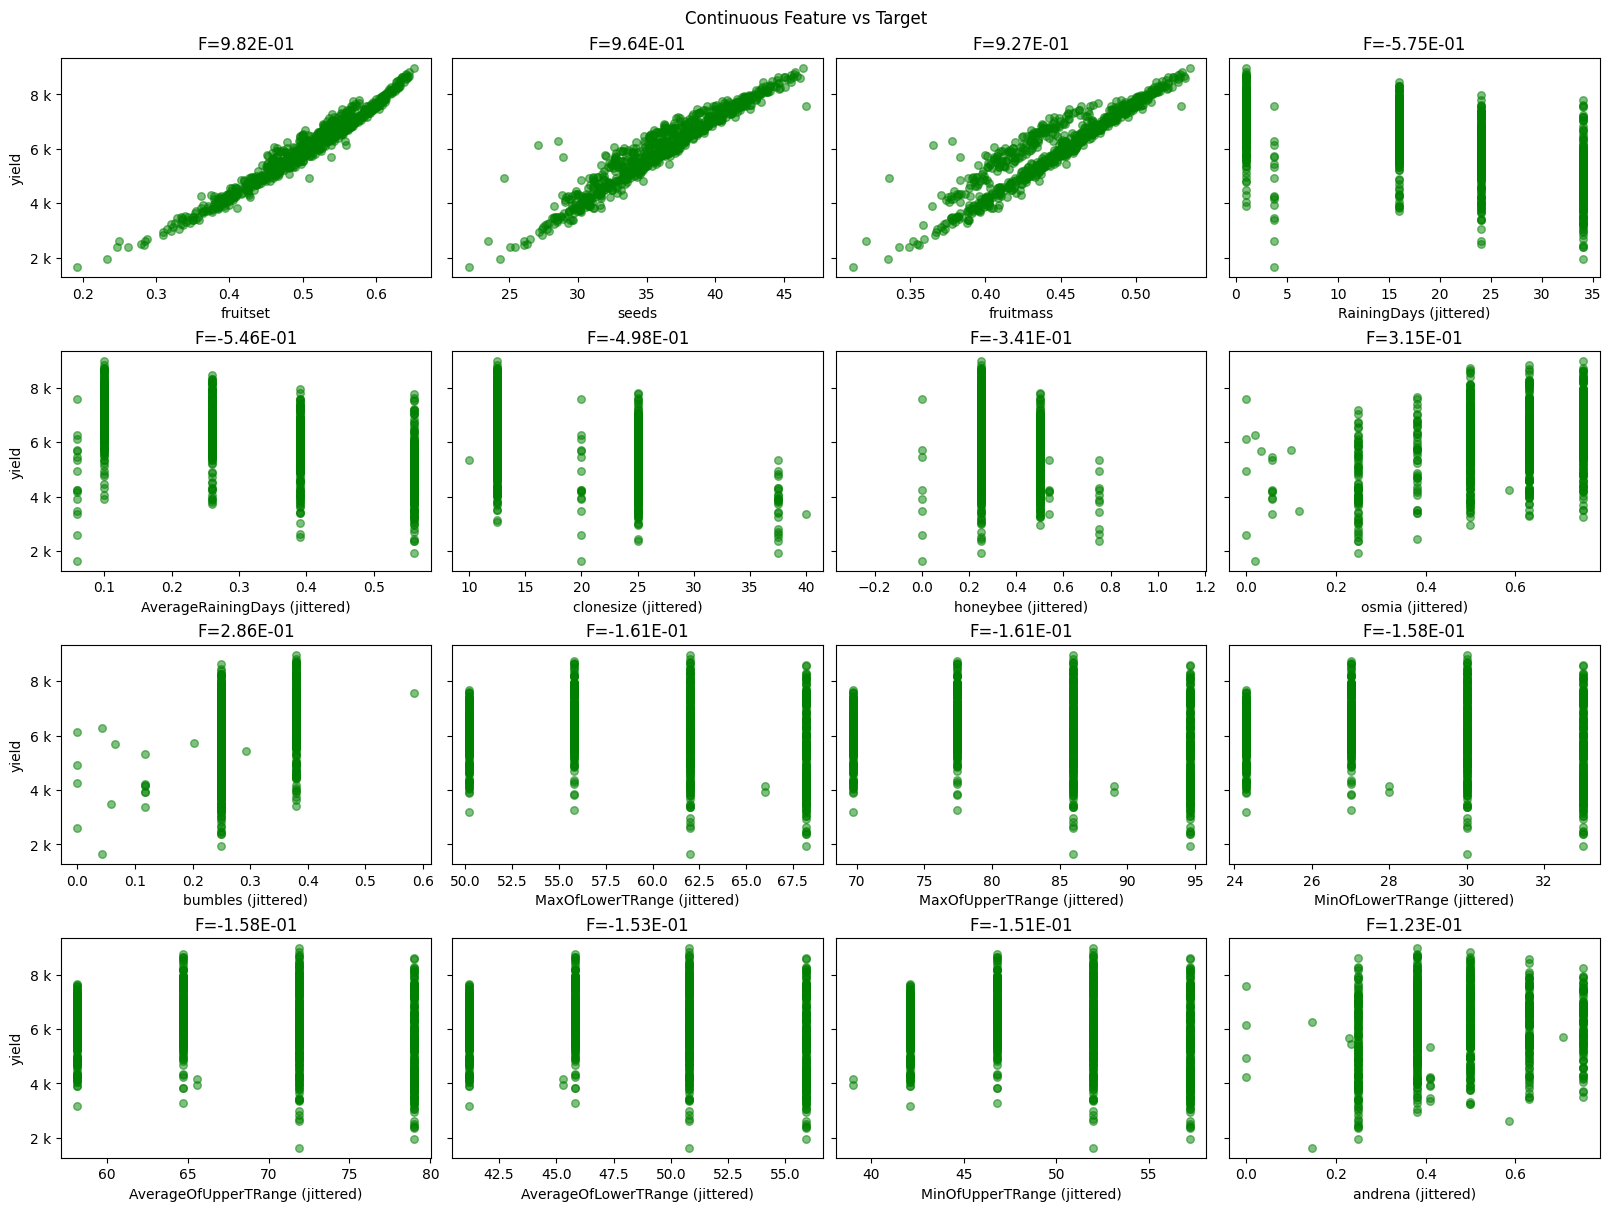

In [13]:
dabl.plot(data, target_col='yield', color='green', prune_correlations_threshold=0)

### Multivariate analysis

<Axes: >

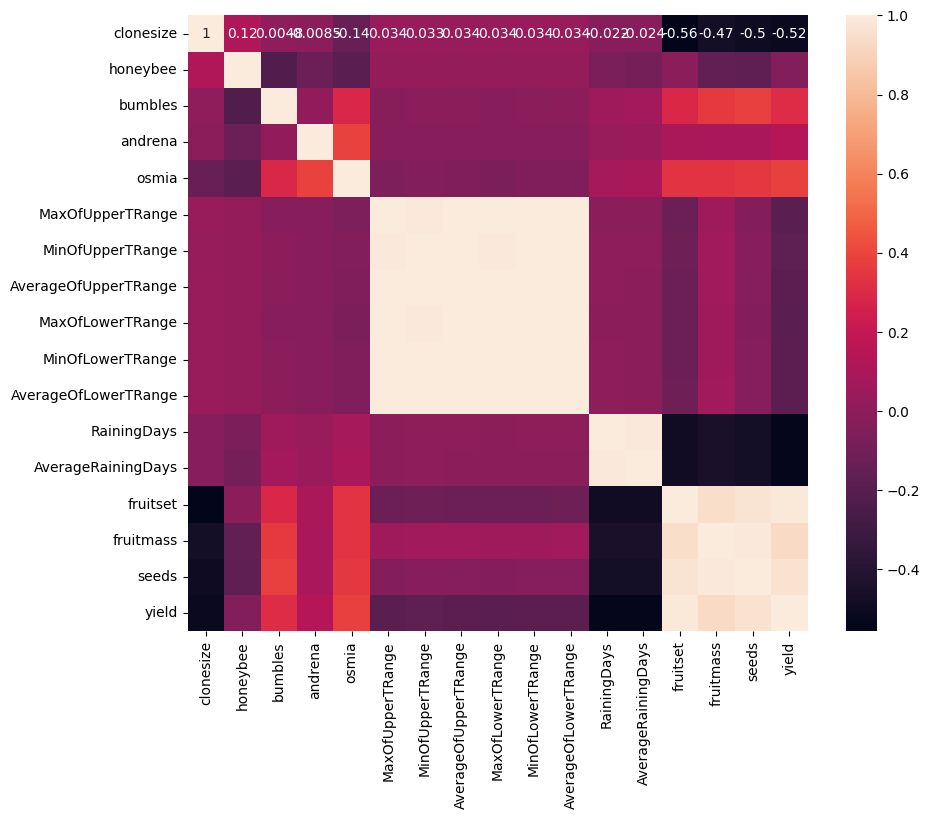

In [14]:
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(),annot=True)

#### Features fruitset, fruitmass, seeds have a very low correlation with other features. Hence these features are removed.

In [15]:
data.drop(columns=['fruitset', 'fruitmass', 'seeds'],axis=1,inplace=True)

### Removing Outliers

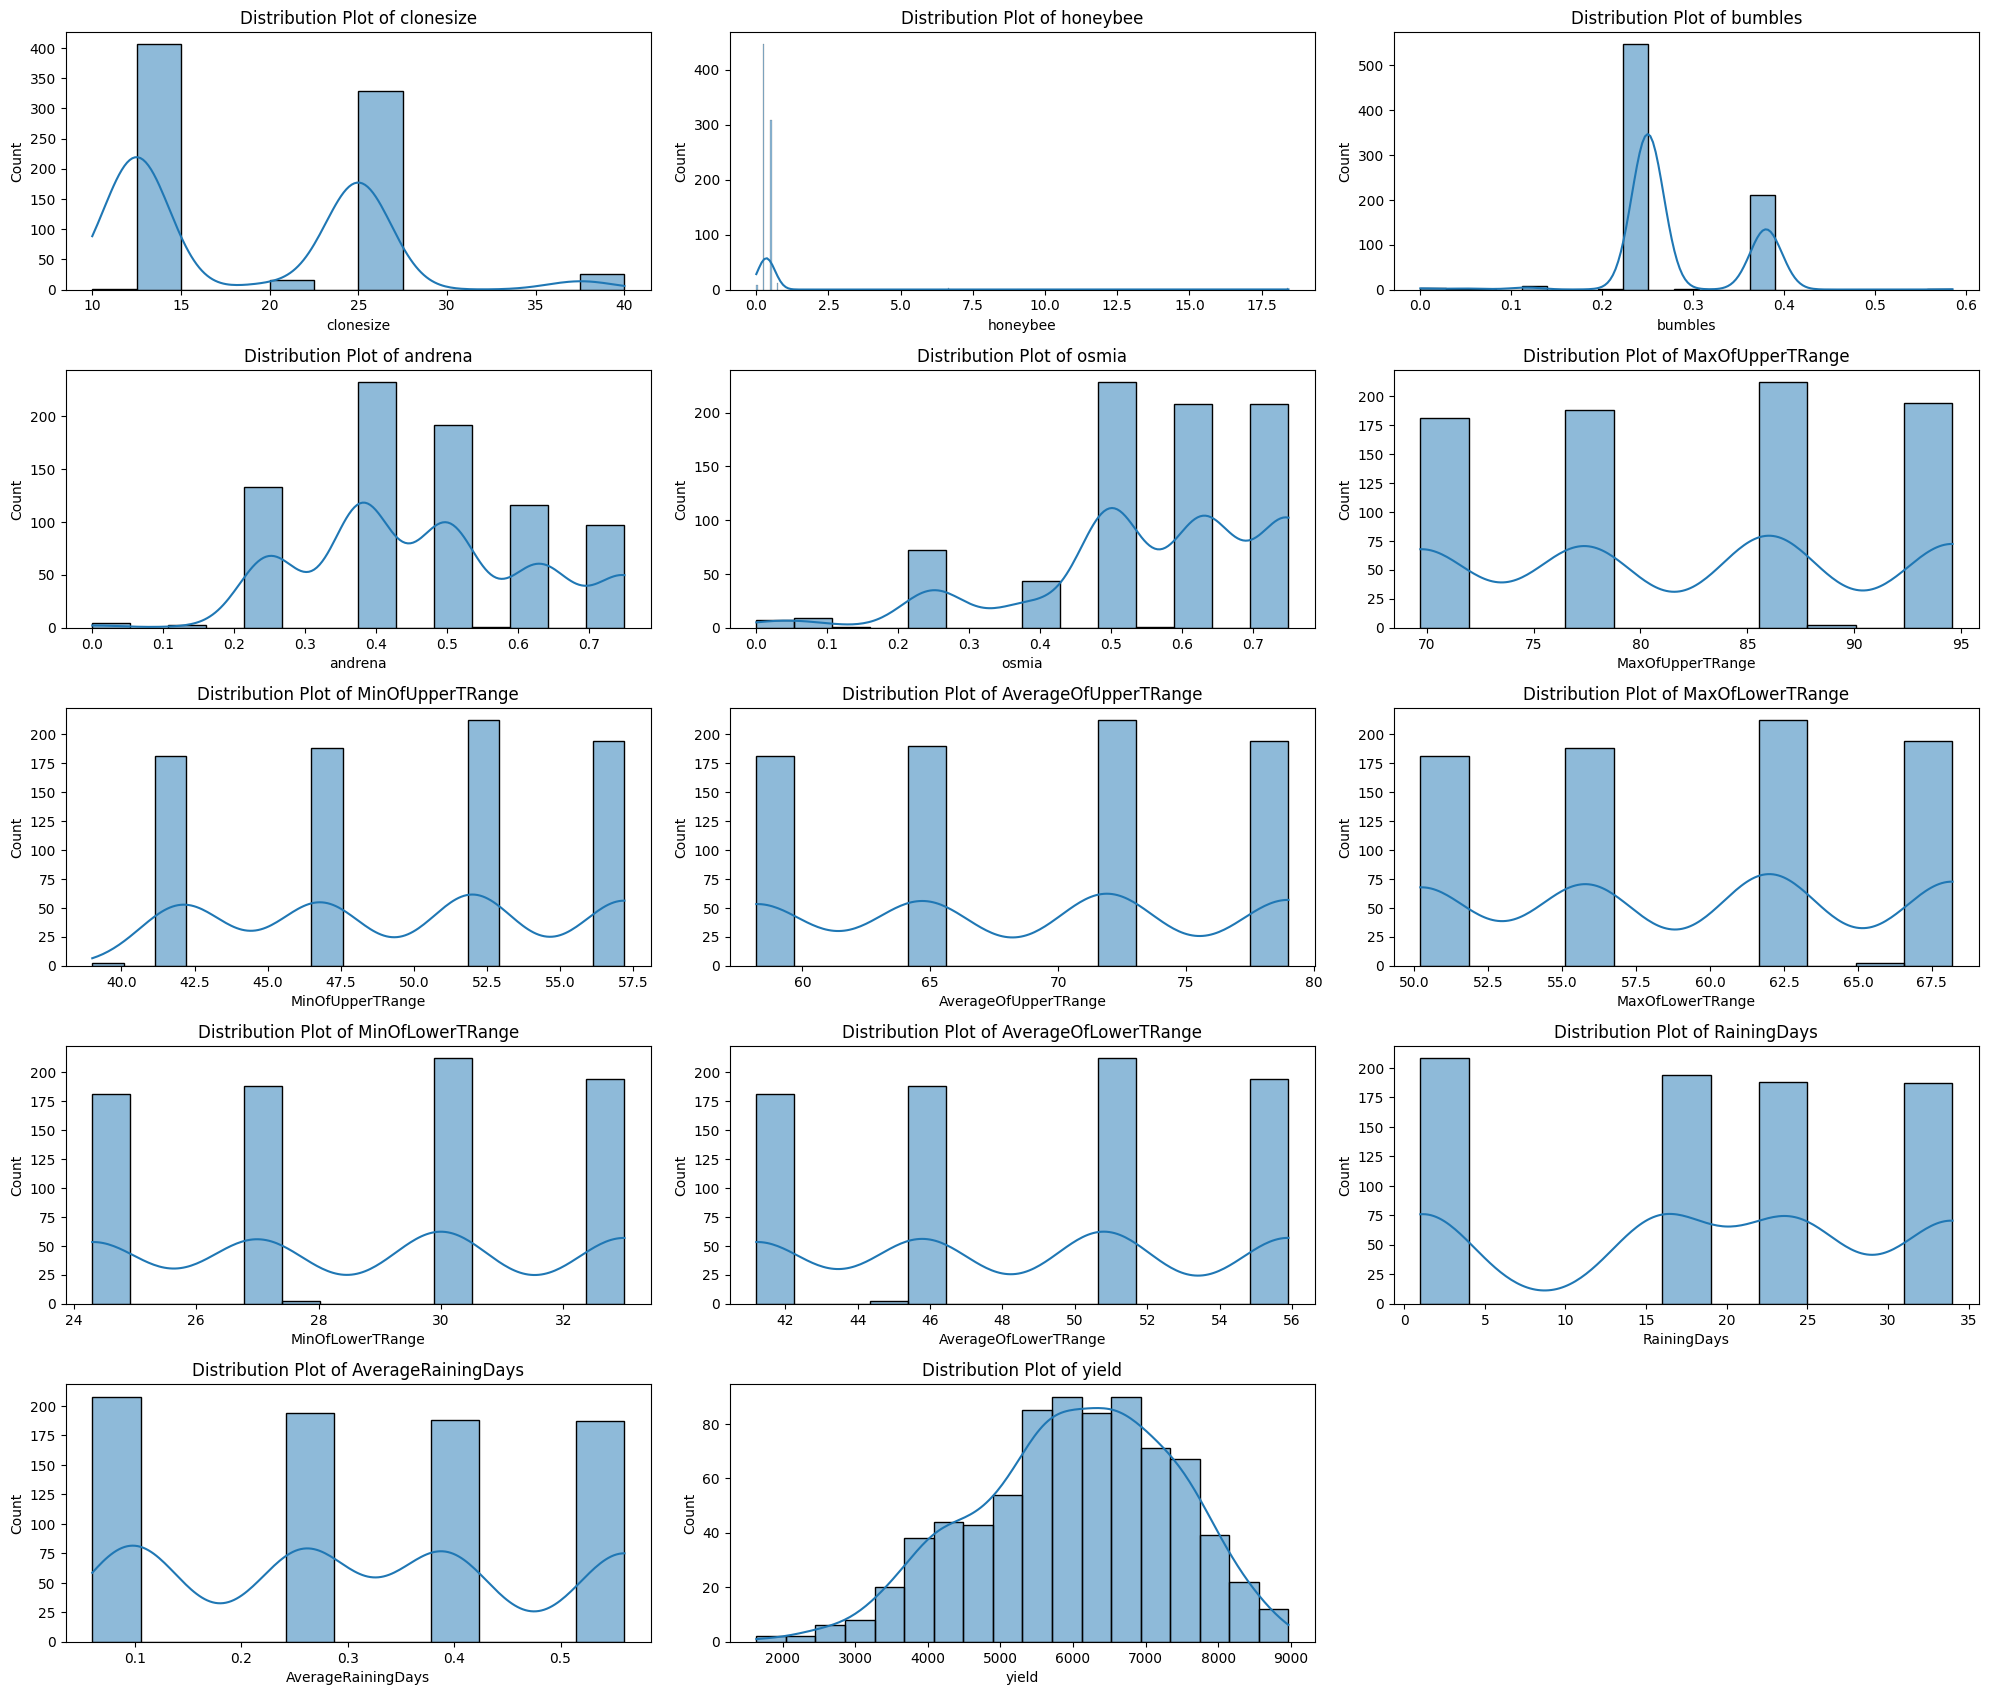

In [16]:
num_features = len(data.columns)
cols = 3
rows = (num_features // cols) + (num_features % cols)
fig, axes = plt.subplots(rows, cols, figsize=(20, 20))
axes = axes.flatten()
for i, feature in enumerate(data.columns):
    sns.histplot(data[feature], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution Plot of {feature}')
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

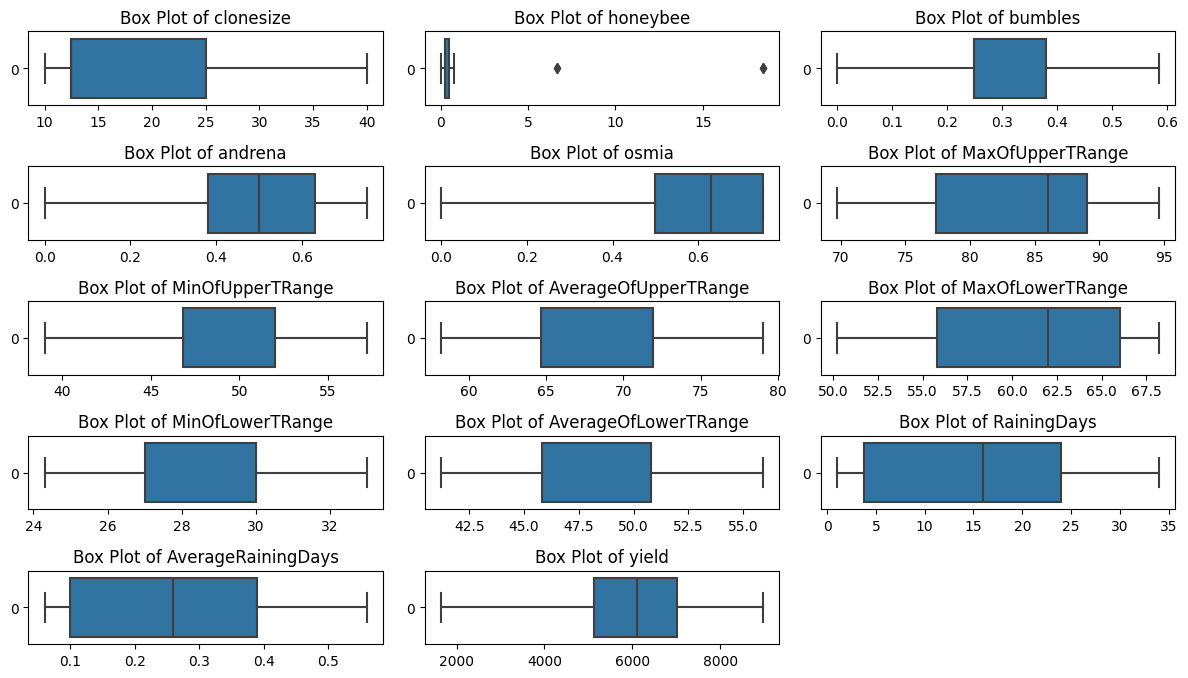

In [17]:
num_features = len(data.columns)
cols = 3
rows = (num_features // cols) + (num_features % cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

axes = axes.flatten()

for i, feature in enumerate(data.columns):
    sns.boxplot(data=data[feature], ax=axes[i],orient='h',whis=3)
    axes[i].set_title(f'Box Plot of {feature}')
    
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

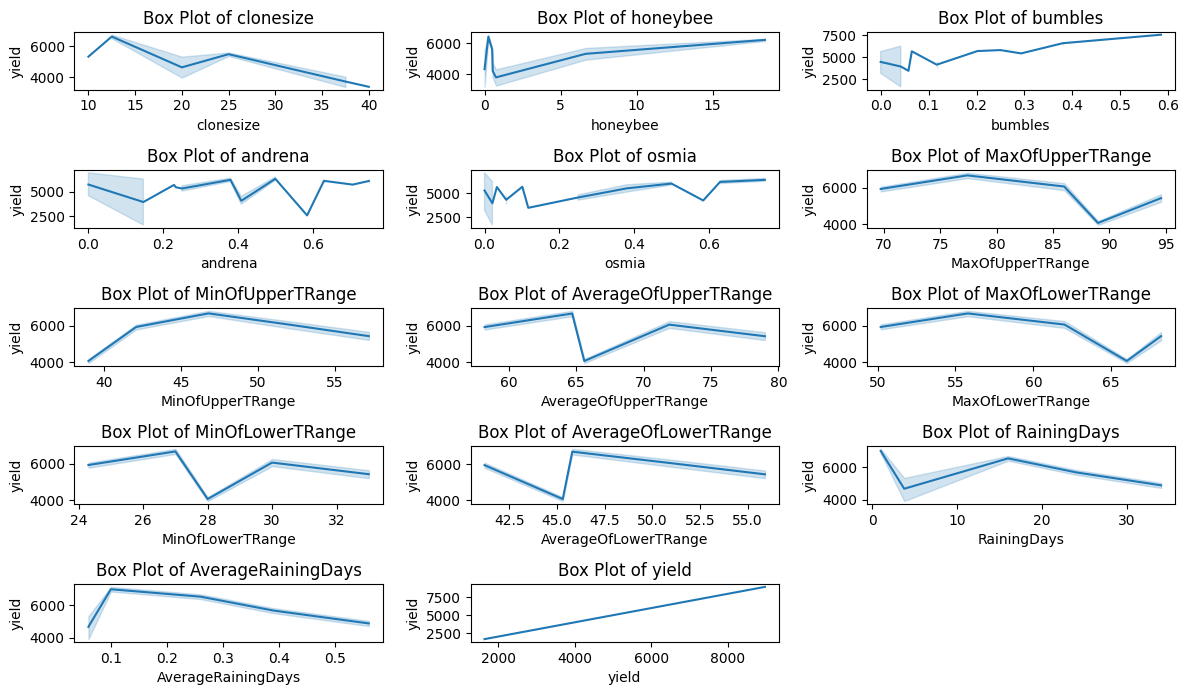

In [18]:
num_features = len(data.columns)
cols = 3
rows = (num_features // cols) + (num_features % cols)

fig, axes = plt.subplots(rows, cols, figsize=(12, 8))

axes = axes.flatten()

for i, feature in enumerate(data.columns):
    sns.lineplot(data=data,x=feature,y="yield", ax=axes[i])
    axes[i].set_title(f'Box Plot of {feature}')
    
for i in range(num_features, len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

array([[<Axes: title={'center': 'clonesize'}>,
        <Axes: title={'center': 'honeybee'}>,
        <Axes: title={'center': 'bumbles'}>,
        <Axes: title={'center': 'andrena'}>],
       [<Axes: title={'center': 'osmia'}>,
        <Axes: title={'center': 'MaxOfUpperTRange'}>,
        <Axes: title={'center': 'MinOfUpperTRange'}>,
        <Axes: title={'center': 'AverageOfUpperTRange'}>],
       [<Axes: title={'center': 'MaxOfLowerTRange'}>,
        <Axes: title={'center': 'MinOfLowerTRange'}>,
        <Axes: title={'center': 'AverageOfLowerTRange'}>,
        <Axes: title={'center': 'RainingDays'}>],
       [<Axes: title={'center': 'AverageRainingDays'}>,
        <Axes: title={'center': 'yield'}>, <Axes: >, <Axes: >]],
      dtype=object)

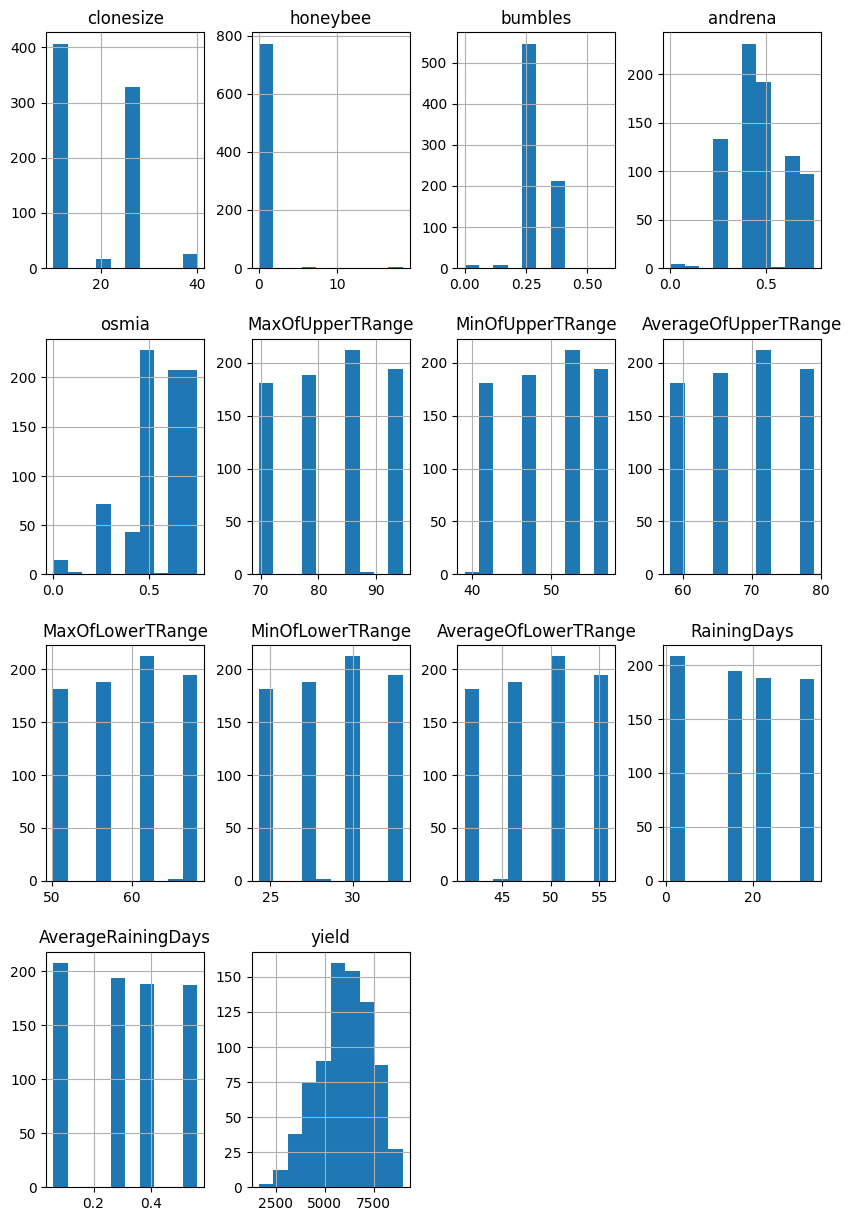

In [19]:
data.hist(figsize=(10,15))

In [20]:
Q1 = data['honeybee'].quantile(0.25)
Q3 = data['honeybee'].quantile(0.75)
IQR=Q3-Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR
print('lower_limit: ',lower_limit)
print('upper_limit: ',upper_limit)

lower_limit:  -0.125
upper_limit:  0.875


In [21]:
data[(data.honeybee<lower_limit)|(data.honeybee>upper_limit)]

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,yield
761,20.0,6.64,0.000,0.000,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,4936.364770
762,20.0,18.43,0.000,0.000,0.000,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,6131.309380
763,20.0,6.64,0.065,0.229,0.033,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,5686.121958
765,20.0,18.43,0.042,0.147,0.021,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,6276.410544


In [22]:
data = data[(data.honeybee>lower_limit)&(data.honeybee<upper_limit)]
data

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,yield
0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,3813.165795
1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,4947.605663
2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,3866.798965
3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,4303.943030
4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,5333.873335
773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,3373.436842
774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,4203.027624
775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,4166.299735


<Axes: >

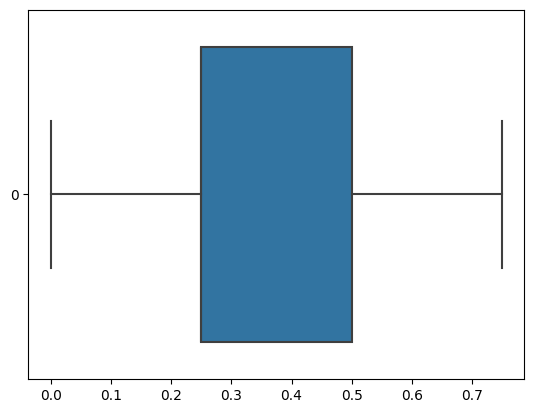

In [23]:
sns.boxplot(data=data['honeybee'], orient='h',whis=3)

In [24]:
data.corr()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,yield
clonesize,1.000000,0.785162,0.008667,-0.006426,-0.139972,0.033804,0.032496,0.033392,0.033943,0.033412,0.033215,-0.020680,-0.023211,-0.516851
honeybee,0.785162,1.000000,0.119736,0.200733,0.145459,0.002798,-0.006444,-0.001290,0.003744,-0.000513,-0.001786,0.022507,0.028300,-0.307027
bumbles,0.008667,0.119736,1.000000,-0.039157,0.244957,-0.015396,0.002504,-0.007875,-0.017274,-0.009015,-0.006173,0.035665,0.047216,0.318185
andrena,-0.006426,0.200733,-0.039157,1.000000,0.363390,-0.021955,-0.019231,-0.020913,-0.022239,-0.021028,-0.020566,0.021236,0.025980,0.139833
osmia,-0.139972,0.145459,0.244957,0.363390,1.000000,-0.058594,-0.037381,-0.049888,-0.060815,-0.051123,-0.047695,0.065564,0.081402,0.388608
MaxOfUpperTRange,0.033804,0.002798,-0.015396,-0.021955,-0.058594,1.000000,0.990953,0.998313,0.999900,0.998841,0.997656,-0.000773,-0.002508,-0.186848
MinOfUpperTRange,0.032496,-0.006444,0.002504,-0.019231,-0.037381,0.990953,1.000000,0.997053,0.988979,0.996264,0.997796,0.001763,0.001352,-0.175643
AverageOfUpperTRange,0.033392,-0.001290,-0.007875,-0.020913,-0.049888,0.998313,0.997053,1.000000,0.997411,0.999944,0.999924,0.000247,-0.000946,-0.181537
MaxOfLowerTRange,0.033943,0.003744,-0.017274,-0.022239,-0.060815,0.999900,0.988979,0.997411,1.000000,0.998070,0.996606,-0.001047,-0.002922,-0.187213
MinOfLowerTRange,0.033412,-0.000513,-0.009015,-0.021028,-0.051123,0.998841,0.996264,0.999944,0.998070,1.000000,0.999787,0.000133,-0.001132,-0.183107


## X and Y Split

In [25]:
y=data['yield']

In [26]:
y.head()

0    3813.165795
1    4947.605663
2    3866.798965
3    4303.943030
4    3436.493543
Name: yield, dtype: float64

In [27]:
X=data.drop(columns=['yield',],axis=1)

In [28]:
X.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39


## Scaling

In [29]:
names=X.columns

In [30]:
names

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays'],
      dtype='object')

In [31]:
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()

In [32]:
X_scaled=scale.fit_transform(X)

In [33]:
X_scaled

array([[ 2.67234719,  2.91964747, -0.52812593, ...,  0.40517505,
        -0.19702952, -0.35962034],
       [ 2.67234719,  2.91964747, -0.52812593, ...,  0.40517505,
        -1.43645427, -1.29757569],
       [ 2.67234719,  2.91964747, -0.52812593, ...,  1.34521837,
        -0.19702952, -0.35962034],
       ...,
       [ 0.17664981,  1.34753621, -2.61170931, ...,  0.40517505,
         0.46399701,  0.40246839],
       [ 0.17664981,  1.34753621, -2.61170931, ..., -0.60859715,
        -1.20757383, -1.53206453],
       [ 0.17664981,  1.34753621, -2.61170931, ..., -0.60859715,
         0.46399701,  0.40246839]])

In [34]:
X=pd.DataFrame(X_scaled, columns=names)

In [35]:
X

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays
0,2.672347,2.919647,-0.528126,-1.389050,-1.911258,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,-0.197030,-0.359620
1,2.672347,2.919647,-0.528126,-1.389050,-1.911258,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,-1.436454,-1.297576
2,2.672347,2.919647,-0.528126,-1.389050,-1.911258,1.340425,1.340322,1.338813,1.337454,1.342889,1.345218,-0.197030,-0.359620
3,2.672347,2.919647,-0.528126,-1.389050,-1.911258,1.340425,1.340322,1.338813,1.337454,1.342889,1.345218,-1.436454,-1.297576
4,2.672347,2.919647,-0.528126,-1.389050,-1.911258,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,0.463997,0.402468
...,...,...,...,...,...,...,...,...,...,...,...,...,...
768,-1.249463,1.347536,-2.611709,-0.388587,-3.076584,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,-1.207574,-1.532065
769,3.028875,1.347536,-2.611709,-0.388587,-3.076584,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,-1.207574,-1.532065
770,0.176650,1.347536,-2.611709,-0.388587,-3.076584,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,0.463997,0.402468
771,0.176650,1.347536,-2.611709,-0.388587,-3.076584,0.732236,-1.907263,-0.404060,1.007016,-0.212620,-0.608597,-1.207574,-1.532065


## Train & Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=20)

In [38]:
X_train.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays
226,-0.892935,-0.770755,-0.528126,0.184005,-0.393907,-1.363847,-1.354103,-1.366542,-1.366134,-1.363697,-1.364318,1.290280,1.399046
546,0.889706,1.074446,-0.528126,0.184005,1.123445,-0.527586,-0.515441,-0.521119,-0.525018,-0.523722,-0.516436,-1.436454,-1.297576
419,-0.892935,-0.770755,1.508459,0.184005,0.395116,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,-0.197030,-0.359620
376,-0.892935,-0.770755,1.508459,-0.571061,0.395116,0.406420,0.412441,0.415350,0.406218,0.409584,0.405175,1.290280,1.399046
166,-0.892935,-0.770755,-0.528126,-0.571061,-0.393907,1.340425,1.340322,1.338813,1.337454,1.342889,1.345218,-1.436454,-1.297576


In [39]:
y_train

226    4952.985600
546    7293.536170
419    8116.531753
376    5747.560170
166    6822.971627
          ...     
218    3804.610168
223    6638.656487
271    6887.466493
474    6731.618436
355    8134.726547
Name: yield, Length: 541, dtype: float64

In [40]:
y_test

524    5637.984297
14     3900.344042
507    5453.993821
745    6707.592585
590    4808.609022
          ...     
59     6125.695384
710    5597.022161
91     7022.189731
685    6020.875690
129    6615.690061
Name: yield, Length: 232, dtype: float64

In [41]:
X_train.shape

(541, 13)

In [42]:
X_test.shape

(232, 13)

## Model Fitting

## 1. Linear Regression

In [43]:
from sklearn.linear_model import LinearRegression

In [44]:
lr=LinearRegression()

In [45]:
lr.fit(X_train,y_train)

LinearRegression()

In [46]:
y_lrpred=lr.predict(X_test)

In [47]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [48]:
r2_lr=r2_score(y_lrpred,y_test)
mse_lr = mean_squared_error(y_test,y_lrpred)
mae_lr = mean_absolute_error(y_test,y_lrpred)
rmse_lr = np.sqrt(mse_lr)
print("Mean Absolute Error: ", mae_lr)
print("Root Mean Squared Error: ", rmse_lr)
print("R2: ", r2_lr*100)

Mean Absolute Error:  351.5273933689596
Root Mean Squared Error:  463.7929580320768
R2:  88.81392550043708


In [49]:
lr.coef_

array([-7.81412423e+02,  1.05170172e+02,  3.67575668e+02,  4.70573979e+01,
        3.86128289e+02, -7.26659252e+04, -4.03352091e+04,  8.16964032e+04,
        2.74693037e+04, -4.20304961e+04,  4.55009884e+04,  6.70530451e+02,
       -1.45856962e+03])

In [50]:
lr.intercept_

6024.999995993861

## 2. Decision Tree

In [51]:
from sklearn.tree import DecisionTreeRegressor

In [52]:
dt=DecisionTreeRegressor(criterion="squared_error", random_state=42, max_depth=5)

In [53]:
dt.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=5, random_state=42)

In [54]:
y_dtpred=dt.predict(X_test)

In [55]:
r2_dt=r2_score(y_dtpred,y_test)
mse_dt = mean_squared_error(y_test,y_dtpred)
mae_dt = mean_absolute_error(y_test,y_dtpred)
rmse_dt = np.sqrt(mse_dt)
print("Mean Absolute Error: ", mae_dt)
print("Root Mean Squared Error: ", rmse_dt)
print("R2: ", r2_dt*100)

Mean Absolute Error:  421.6096623777866
Root Mean Squared Error:  539.5911930066827
R2:  82.80694144829309


## 3. Random Forest

In [56]:
from sklearn.ensemble import RandomForestRegressor

In [57]:
rf = RandomForestRegressor(n_estimators=100, random_state=42, max_depth=5)

In [58]:
rf.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [59]:
y_rfpred=rf.predict(X_test)

In [60]:
r2_rf=r2_score(y_rfpred,y_test)
mse_rf = mean_squared_error(y_test,y_rfpred)
mae_rf = mean_absolute_error(y_test,y_rfpred)
rmse_rf = np.sqrt(mse_rf)
print("Mean Absolute Error: ", mae_rf)
print("Root Mean Squared Error: ", rmse_rf)
print("R2: ", r2_rf*100)

Mean Absolute Error:  382.0077129253888
Root Mean Squared Error:  499.75198453244883
R2:  84.93700199371773


## 4. XGBoost

In [61]:
import xgboost as xgb

In [62]:
xg = xgb.XGBRegressor(objective='reg:squarederror', max_depth=5, n_estimators=100, learning_rate=0.1)

In [63]:
xg.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
y_xgpred=xg.predict(X_test)

In [65]:
r2_xg=r2_score(y_xgpred,y_test)
mse_xg = mean_squared_error(y_test,y_xgpred)
mae_xg = mean_absolute_error(y_test,y_xgpred)
rmse_xg = np.sqrt(mse_xg)
print("Mean Absolute Error: ", mae_xg)
print("Root Mean Squared Error: ", rmse_xg)
print("R2: ", r2_xg*100)

Mean Absolute Error:  180.54001388799836
Root Mean Squared Error:  260.16663946930686
R2:  96.60866093301176


## 5. SVM Regression

In [66]:
from sklearn.svm import SVR

In [67]:
sv = SVR(kernel='linear')

In [68]:
sv.fit(X_train,y_train)

SVR(kernel='linear')

In [69]:
y_svpred=sv.predict(X_test)

In [70]:
r2_sv=r2_score(y_svpred,y_test)
mse_sv = mean_squared_error(y_test,y_svpred)
mae_sv = mean_absolute_error(y_test,y_svpred)
rmse_sv = np.sqrt(mse_sv)
print("Mean Absolute Error: ", mae_sv)
print("Root Mean Squared Error: ", rmse_sv)
print("R2: ", r2_sv*100)

Mean Absolute Error:  791.3395460584552
Root Mean Squared Error:  1001.0729656594508
R2:  -251.22528500340113


### *Hyper Parameter Tuning for SVM*

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
svr = SVR(kernel='linear')

param_grid = {
    'C': [0.1, 1, 10, 100],
    'epsilon': [0.001, 0.01, 0.1, 1],
    'gamma': ['scale', 'auto']
}

grid_search = GridSearchCV(estimator=svr, param_grid=param_grid, scoring='neg_mean_squared_error', cv=5)

grid_search.fit(X_train, y_train)

print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X)

mse = mean_squared_error(y, y_pred)
print("Mean Squared Error: ", mse)

Best hyperparameters:  {'C': 100, 'epsilon': 1, 'gamma': 'scale'}
Best score:  -393657.41299166577
Mean Squared Error:  363111.5931440774


In [73]:
sv2= SVR(C=100, epsilon=0.001, gamma='auto', kernel='linear')

sv2.fit(X_train,y_train)

SVR(C=100, epsilon=0.001, gamma='auto', kernel='linear')

In [74]:
y_sv2pred=sv2.predict(X_test)

In [75]:
r2_sv2=r2_score(y_sv2pred,y_test)
mse_sv2 = mean_squared_error(y_test,y_sv2pred)
mae_sv2 = mean_absolute_error(y_test,y_sv2pred)
rmse_sv2 = np.sqrt(mse_sv2)
print("Mean Absolute Error: ", mae_sv2)
print("Root Mean Squared Error: ", rmse_sv2)
print("R2: ", r2_sv2*100)

Mean Absolute Error:  455.29076862926877
Root Mean Squared Error:  586.6050431338982
R2:  81.51332731101449


## Model Evaluvation

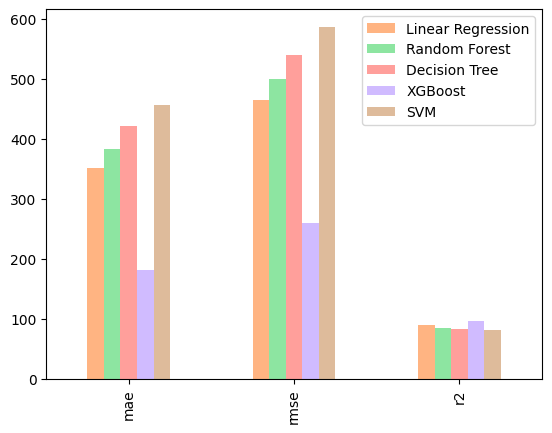

In [76]:
model_eval_rec = {
    'Linear Regression': {
        'mae': mae_lr,
        'rmse': rmse_lr,
        'r2': r2_lr * 100
    },
    'Random Forest': {
        'mae': mae_rf,
        'rmse': rmse_rf,
        'r2': r2_rf * 100
    },
    'Decision Tree': {
        'mae': mae_dt,
        'rmse': rmse_dt,
        'r2': r2_dt * 100
    },
    'XGBoost': {
        'mae': mae_xg,
        'rmse': rmse_xg,
        'r2': r2_xg * 100
    },
    'SVM': {
        'mae': mae_sv2,
        'rmse': rmse_sv2,
        'r2': r2_sv2 * 100
    }
}

pd.DataFrame(model_eval_rec).plot(kind="bar", color=[
    sns.color_palette("pastel")[1],
    sns.color_palette("pastel")[2],
    sns.color_palette("pastel")[3],
    sns.color_palette("pastel")[4],
    sns.color_palette("pastel")[5]
]);


### XGBoost Model is choosen as R2 Score is higher than other models.

## Hyperparameter Tuning for XGBoost Model

### a. Using Grid Search

In [77]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_child_weight': [1, 3, 5],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
grid_search = GridSearchCV(estimator=xgb_reg, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print("Lowest RMSE found: ", (-grid_search.best_score_)**0.5)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best parameters found:  {'colsample_bytree': 0.8, 'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 300, 'subsample': 0.8}
Lowest RMSE found:  227.6414092339271


C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1 fits failed out of a total of 1620.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\HP\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\HP\anaconda3\Lib\site-packages\xgboost\core.py", line 726, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "C:\Users\HP\anaconda3\Lib\site-packages\xgboost\sklearn.py", line 1081, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^

In [78]:
gs_best_model = grid_search.best_estimator_
y_xg2pred=gs_best_model.predict(X_test)
r2_xg2=r2_score(y_xg2pred,y_test)
mse_xg2 = mean_squared_error(y_test,y_xg2pred)
mae_xg2 = mean_absolute_error(y_test,y_xg2pred)
rmse_xg2 = np.sqrt(mse_xg2)
print("Mean Absolute Error: ", mae_xg2)
print("Root Mean Squared Error: ", rmse_xg2)
print("R2: ", r2_xg2*100)

Mean Absolute Error:  160.29633374013335
Root Mean Squared Error:  238.14133777213533
R2:  97.22557418462311


### b. Using Random Search

In [79]:
from sklearn.model_selection import RandomizedSearchCV
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=500, num=10)],
    'learning_rate': [0.001, 0.01, 0.1, 0.2],
    'max_depth': [int(x) for x in np.linspace(3, 10, num=8)],
    'min_child_weight': [1, 3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}
xgb_reg = xgb.XGBRegressor(objective='reg:squarederror')
random_search = RandomizedSearchCV(estimator=xgb_reg, param_distributions=param_dist, n_iter=100, cv=5, verbose=1, random_state=42, n_jobs=-1, scoring='neg_mean_squared_error')
random_search.fit(X_train, y_train)
print("Best parameters found: ", random_search.best_params_)
print("Lowest RMSE found: ", (-random_search.best_score_)**0.5)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best parameters found:  {'subsample': 0.8, 'n_estimators': 188, 'min_child_weight': 1, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.6}
Lowest RMSE found:  232.58159385399492


In [80]:
rs_best_model = random_search.best_estimator_
y_xg3pred=rs_best_model.predict(X_test)
r2_xg3=r2_score(y_xg3pred,y_test)
mse_xg3 = mean_squared_error(y_test,y_xg3pred)
mae_xg3 = mean_absolute_error(y_test,y_xg3pred)
rmse_xg3 = np.sqrt(mse_xg3)
print("Mean Absolute Error: ", mae_xg3)
print("Root Mean Squared Error: ", rmse_xg3)
print("R2: ", r2_xg3*100)

Mean Absolute Error:  165.50653215092942
Root Mean Squared Error:  257.2125151340581
R2:  96.71582906449454


### Random Search gives the best model with highest R2 Score.

In [81]:
best_model=rs_best_model
y_pred=best_model.predict(X_test)
r2=r2_score(y_pred,y_test)
mse = mean_squared_error(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
rmse = np.sqrt(mse)
print("Mean Absolute Error: ", mae)
print("Root Mean Squared Error: ", rmse)
print("R2: ", r2*100)

Mean Absolute Error:  165.50653215092942
Root Mean Squared Error:  257.2125151340581
R2:  96.71582906449454


#### Saving the model

In [82]:
import pickle
with open('best_model.pkl', 'wb') as file:
    pickle.dump(best_model, file)

#### Saving the scaler

In [83]:
with open('standard_scaler.pkl', 'wb') as file:
    pickle.dump(scale, file)